In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'ticks', font_scale = 1.15, context = 'notebook', palette='bright', color_codes=True)
blue, red = '#1A74FE', '#FF2626'
pd.pandas.set_option('display.max_columns', None)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Introduction

The aim of this project is to predict prices of houses based on various criteria. My personal goal is to achieve the lowest RMSE score I can get with real world practices (ie not leaking test set, using same procedures done on real applications, etc)

# Dataset

In [2]:
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing Values

In [4]:
missing = data.columns[data.isna().any()]
missing

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
data[missing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

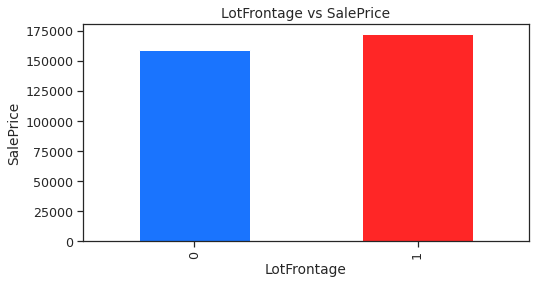

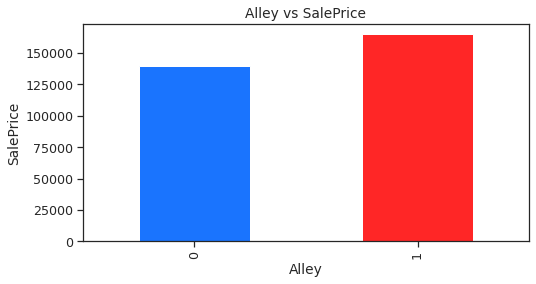

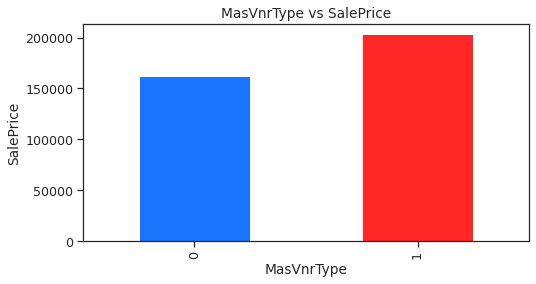

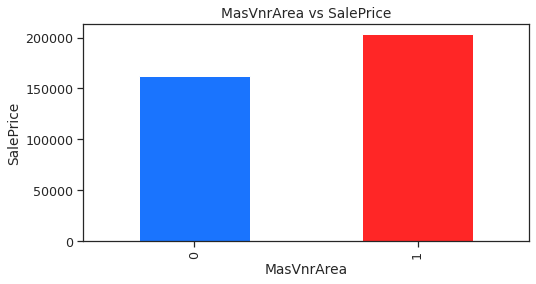

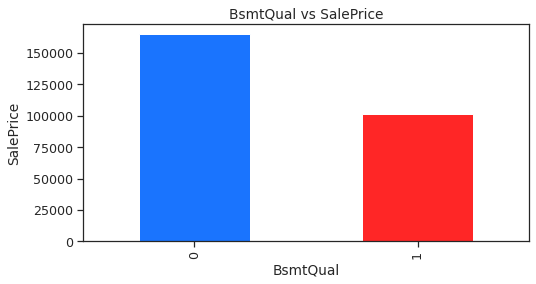

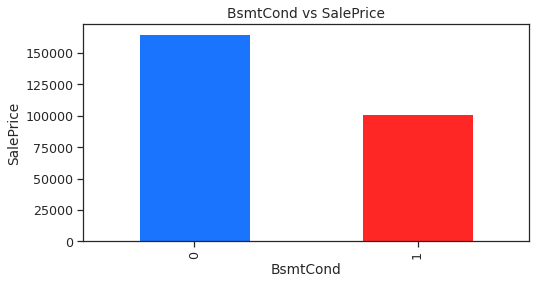

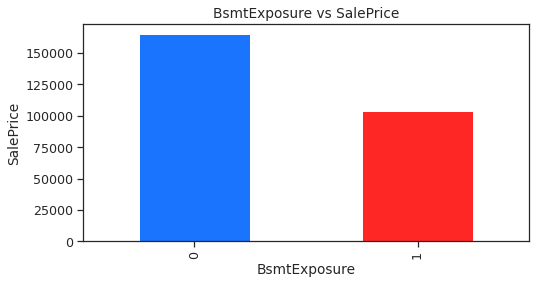

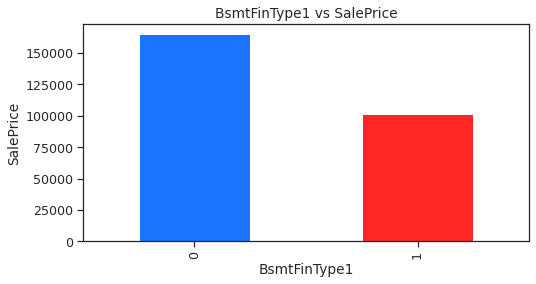

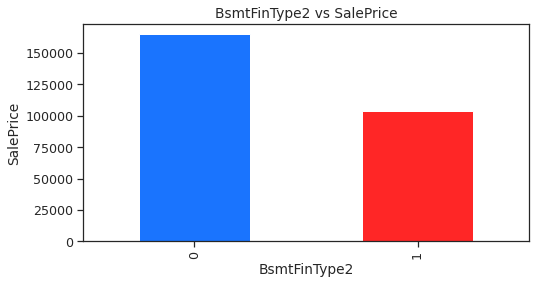

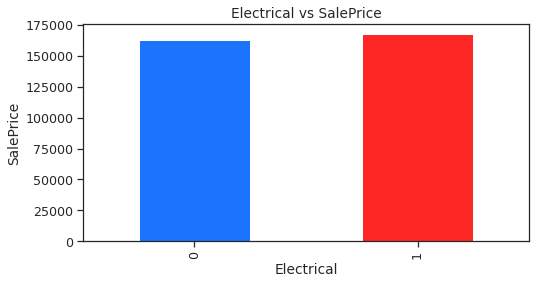

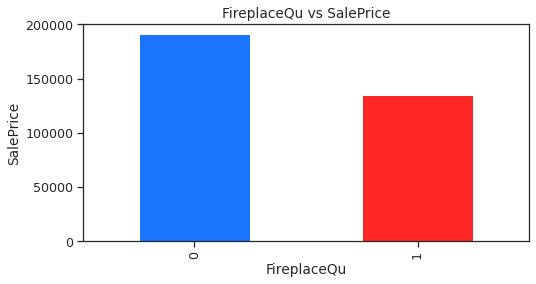

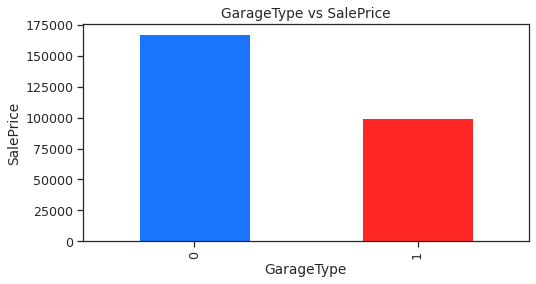

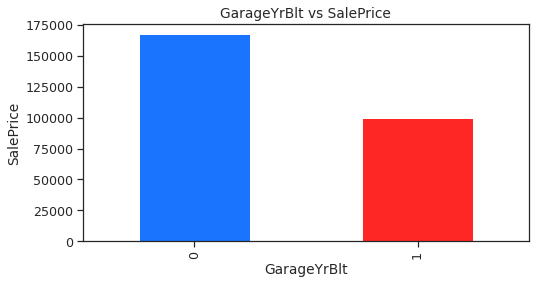

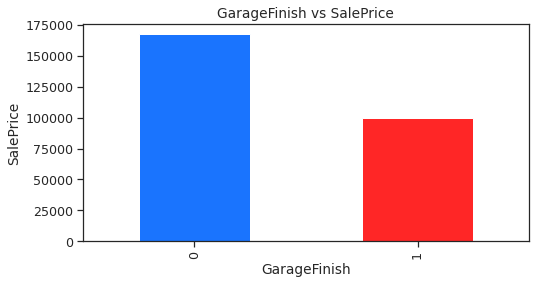

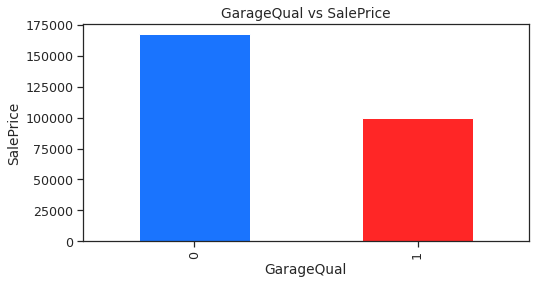

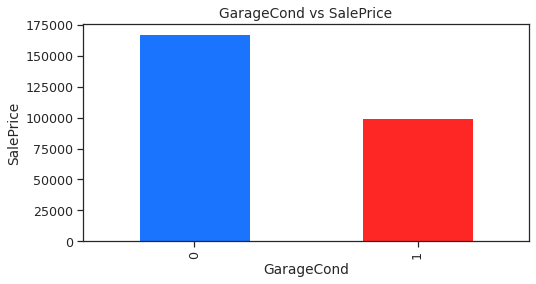

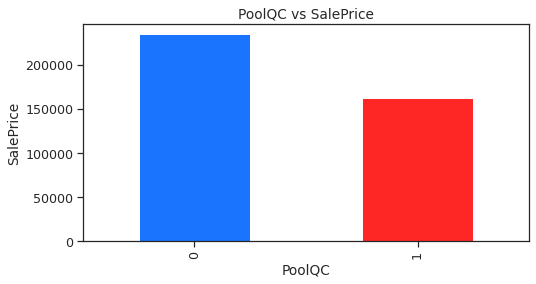

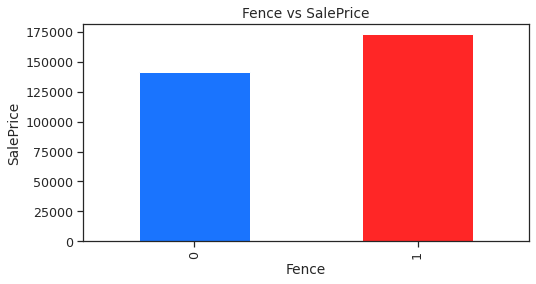

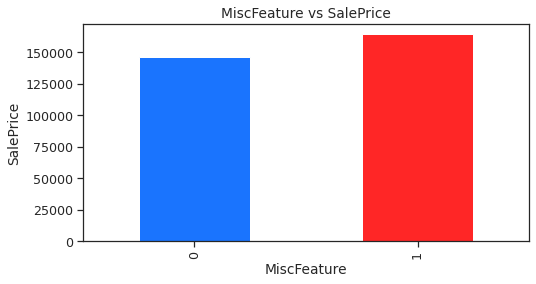

In [6]:
for col in missing:
    copy = data.copy()
    copy[col] = np.where(data[col].isna(), 1, 0)
    gr = copy.groupby(col)['SalePrice'].median()
    plt.figure(figsize=(8,4))
    gr.plot(kind='bar', color=[blue,red])
    plt.ylabel('SalePrice')
    plt.title(str(col)+ ' vs SalePrice')
    plt.show()

There is a relation between missing values and the target variable SalePrice. In other words, there is importance in the missing values with regards to predicting the SalePrice. Therefore, we need to treat missing values accordingly later on in the feature engineering section.

## Temporal Features

In [7]:
temp = ['YearBuilt','YearRemodAdd','GarageYrBlt']
sold = ['MoSold','YrSold']
categorical = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1', 'Condition2',
               'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
               'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition', 'Utilities']
discrete = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars']
continuous = ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea',
              'WoodDeckSF','OpenPorchSF','EnclosedPorch','MasVnrArea','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

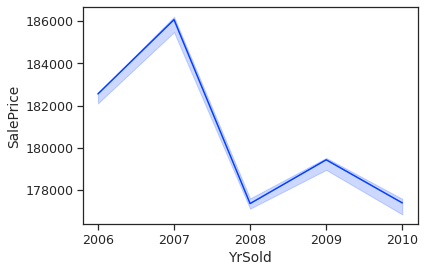

In [8]:
sns.lineplot(data=data, x='YrSold', y='SalePrice', ci=5)

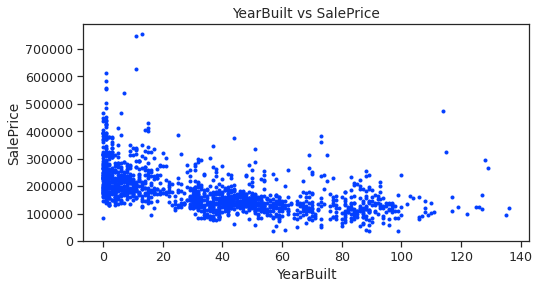

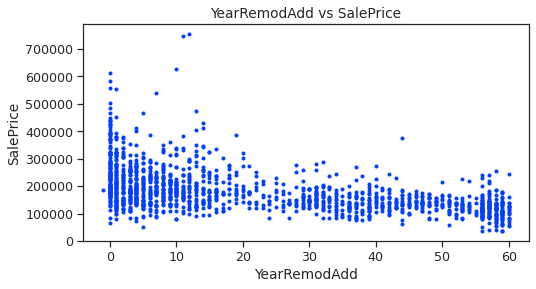

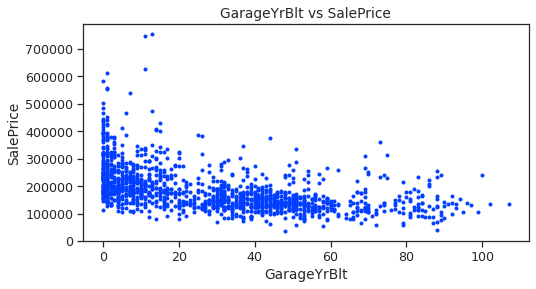

In [9]:
def plotTemp(x):
    plt.figure(figsize=(8,4))
    plt.scatter((data['YrSold']-data[x]), data['SalePrice'], marker='.')
    plt.xlabel(x)
    plt.ylabel('SalePrice')
    plt.title(str(x) + ' vs SalePrice')
    plt.show()

for x in temp:
    plotTemp(x)

Time-related features and in this case in the form of years are transformed into a length of years instead of the year itself by subtraction it from the YrSold. This is done because the YrSold and the SalePrice had an unintuitive correlation when graphed against each other. Once transformed, we can make better inferences as more intuitive correlations are made.

## Discrete Values

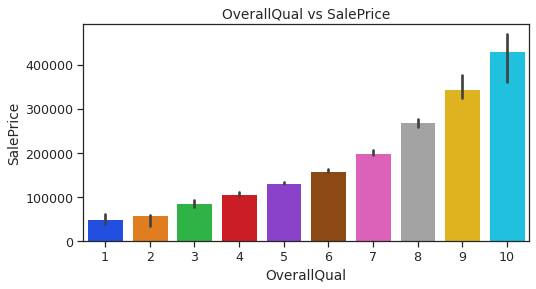

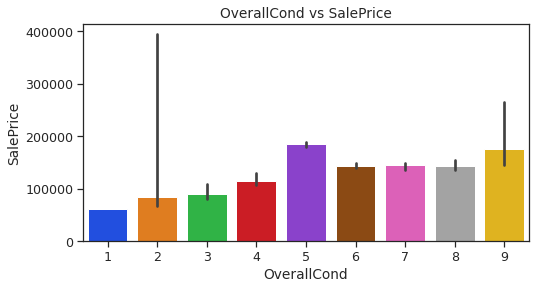

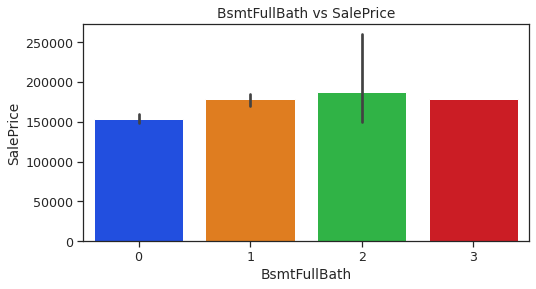

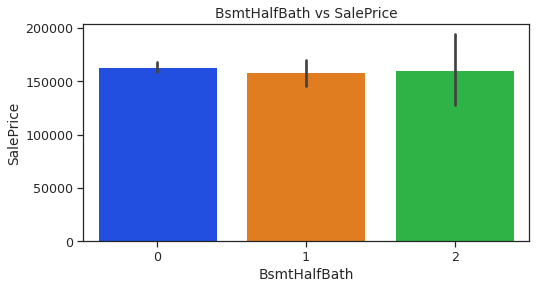

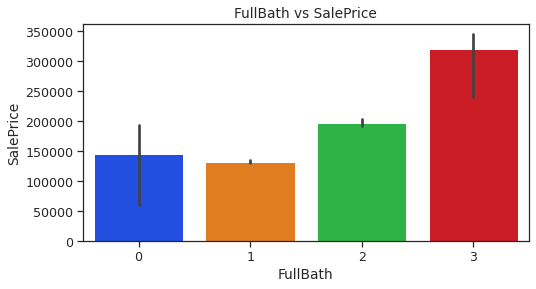

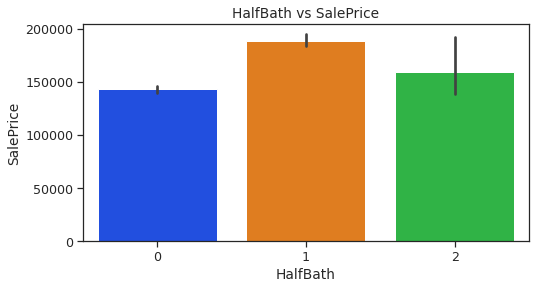

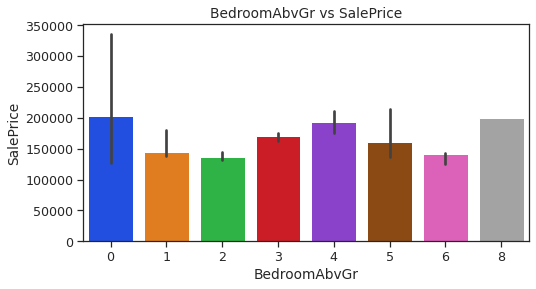

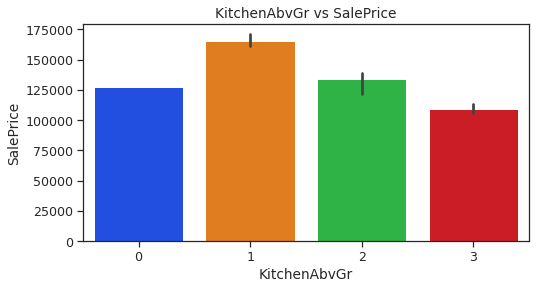

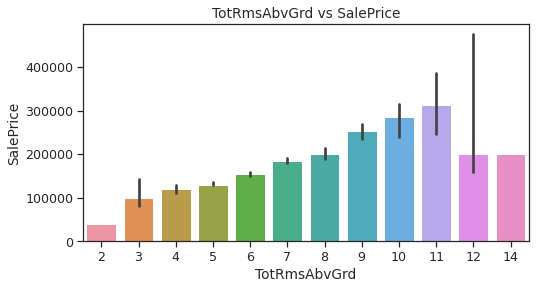

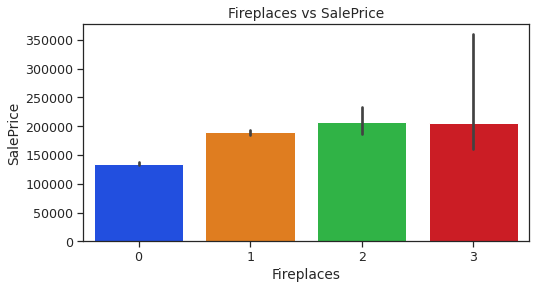

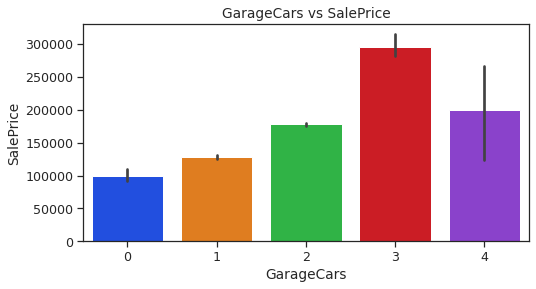

In [10]:
def plotDiscrete(x):
    plt.figure(figsize=(8,4))
    sns.barplot(data=copy, x=x, y='SalePrice',estimator=np.median)
    plt.xlabel(x)
    plt.ylabel('SalePrice')
    plt.title(str(x) + ' vs SalePrice')
    plt.show()

for x in discrete:
    plotDiscrete(x)

Discrete values are plotted using bar graphs to see how they correlate with the SalePrice. We can see different patterns in the graphs formed with each separate column.

## Continuous Variable

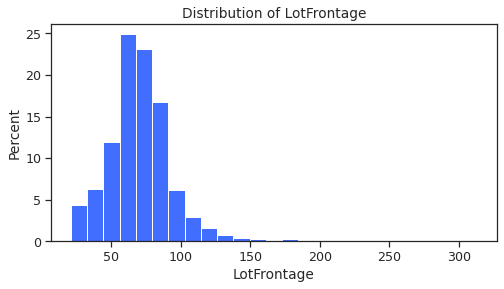

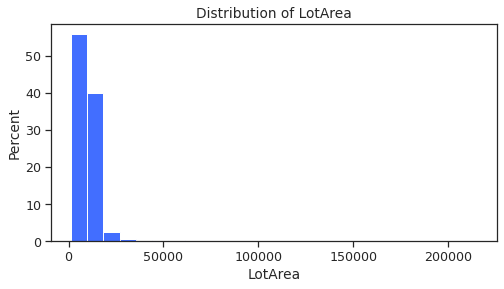

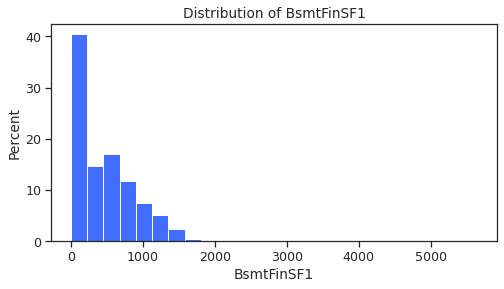

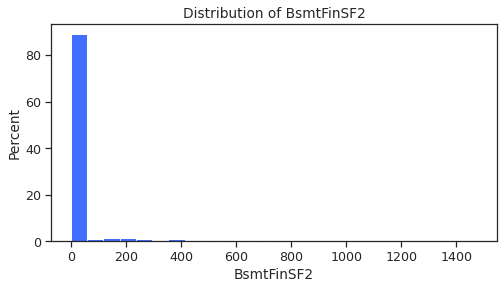

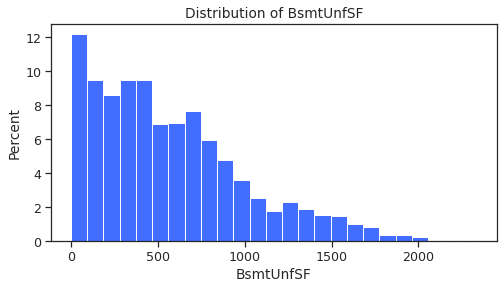

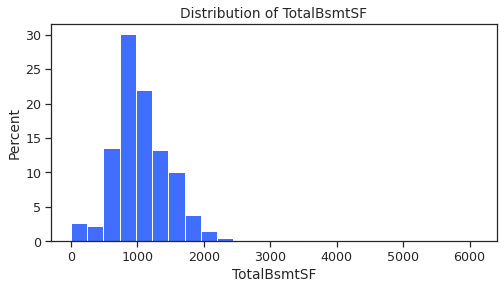

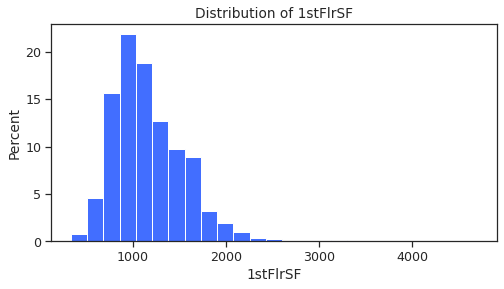

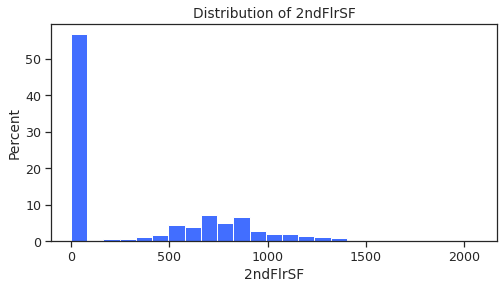

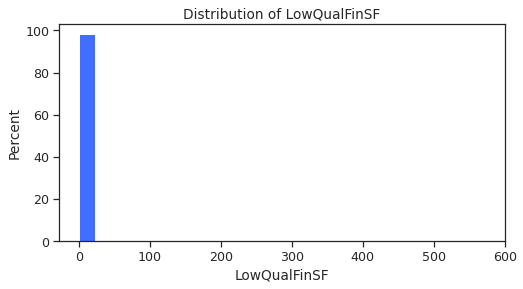

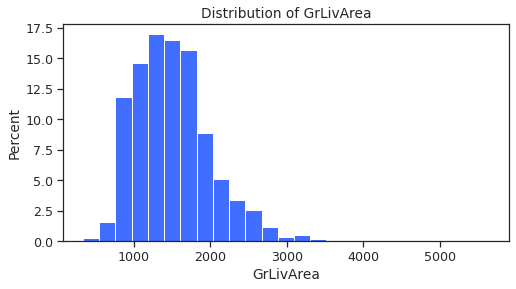

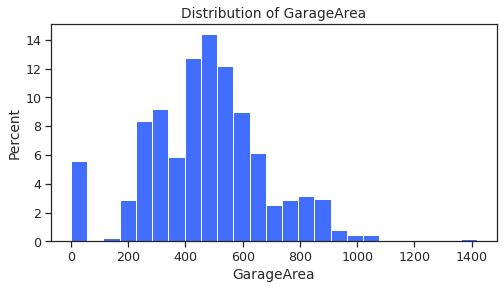

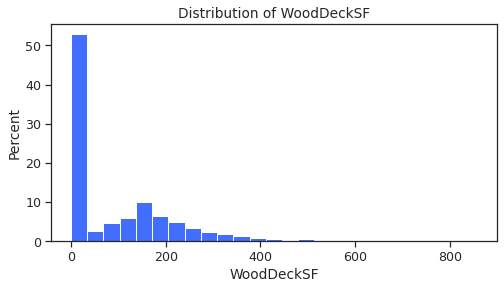

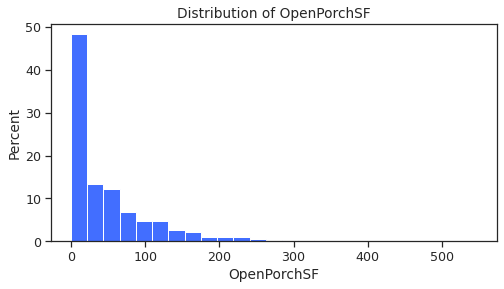

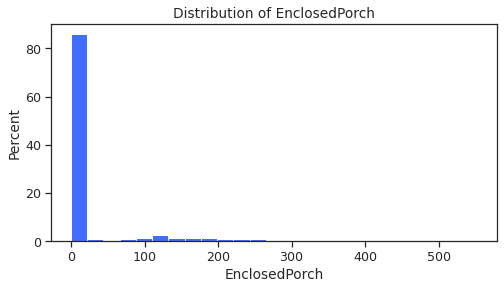

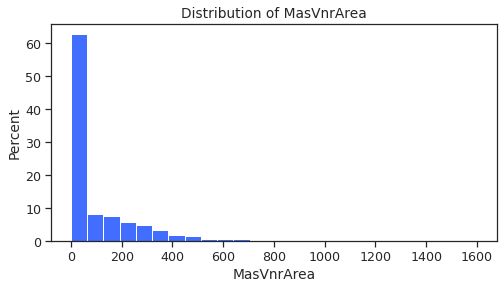

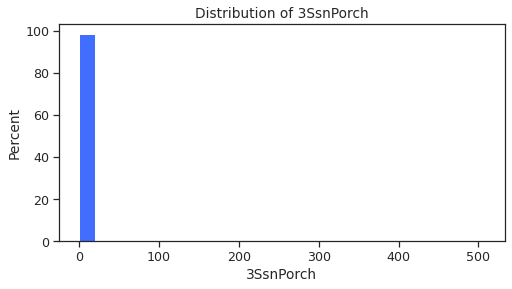

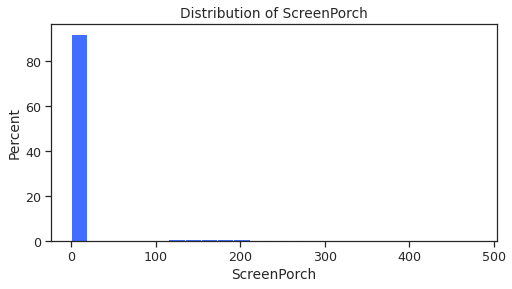

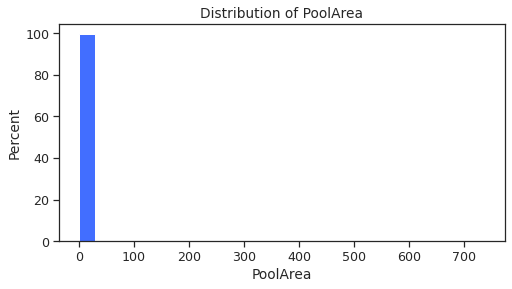

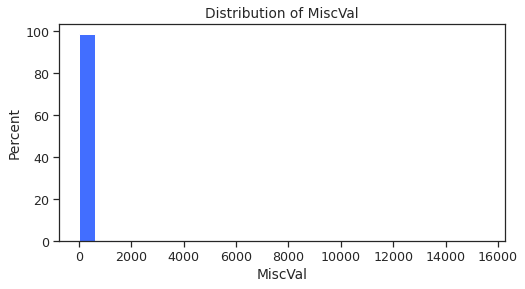

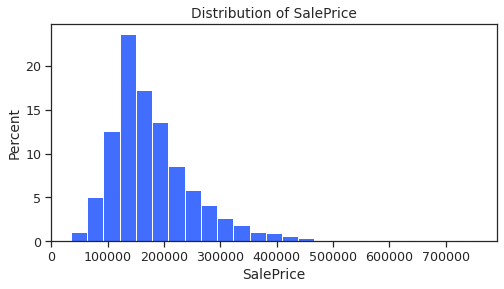

In [11]:
def plotContinuous(x):
    plt.figure(figsize=(8,4))
    sns.histplot(data=copy, x=x, bins=25, stat='percent')
    plt.xlabel(x)
    plt.ylabel('Percent')
    plt.title('Distribution of ' + str(x))
    plt.show()

for x in continuous:
    plotContinuous(x)

We see that some of the features are not normally distributed, while some are, however mostly right-skewed. Transformation needs to be done in order to get a more normal distribution.

# Box-Cox Transformation

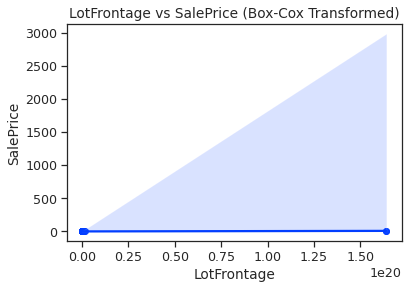

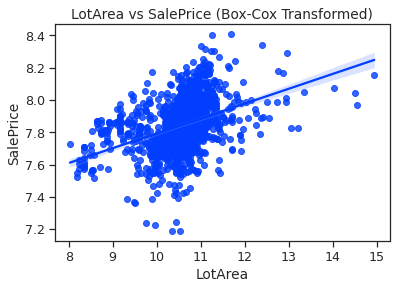

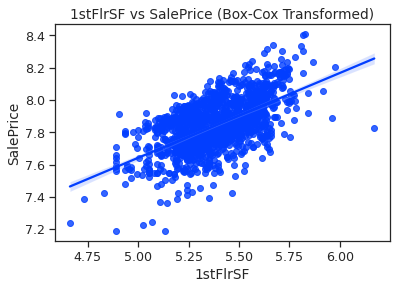

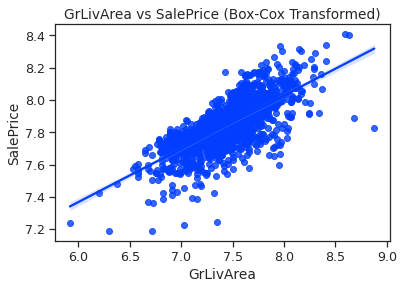

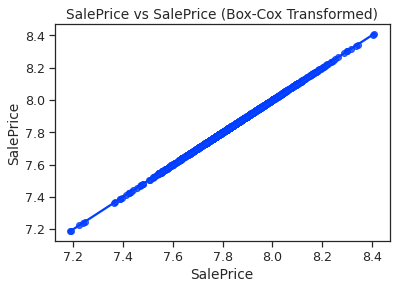

In [12]:
for col in continuous:
    copy = data.copy()
    if 0 in copy[col].unique():
        pass
    else:
        x = st.boxcox(abs(copy[col]))
        y = st.boxcox(copy['SalePrice'])
        sns.regplot(x=x[0], y=y[0])    
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.title(str(col) + ' vs SalePrice (Box-Cox Transformed)')
        plt.show()

One of the many ways to transform numeric values into a better-formed normal distribution is the box-cox transformation. Using scatterplots, we see that there are better positive correlations in each of the graphs, with an exception of LotFrontage due to having outrageous outliers, which can be removed.

## Outliers

8.472135811722177


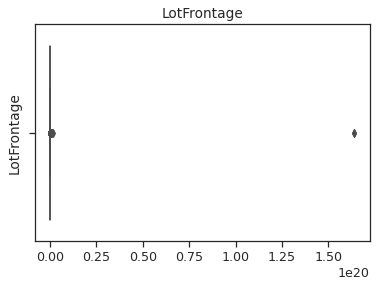

0.03094631071248529


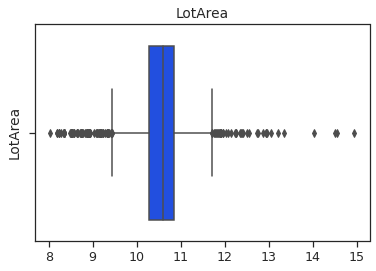

-0.07883214484264238


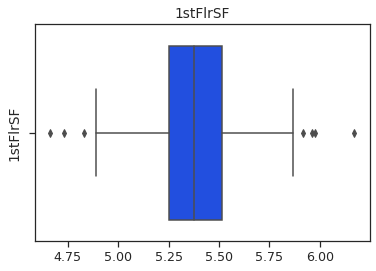

0.006304841218621503


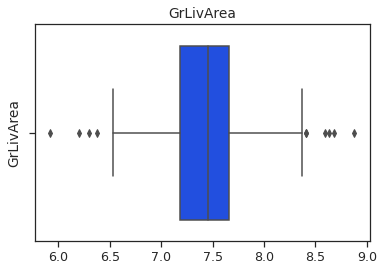

-0.07692391328663316


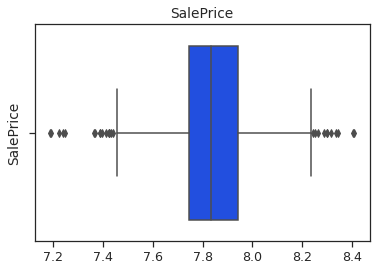

In [13]:
for col in continuous:
    copy = data.copy()
    if 0 in copy[col].unique():
        pass
    else:
        x = st.boxcox(abs(copy[col]))
        sns.boxplot(x=x[0])
        print(x[1])
        plt.ylabel(col)
        plt.title(str(col))
        plt.show()

In graphs above, we confirm that there are outliers, especially in the LotFrontage column, which will be taken care of in the Feature Engineering section.

## Categorical Values

In [14]:
for col in categorical:
    print(col.ljust(13), ':', len(data[col].unique()), 'categories')

MSSubClass    : 15 categories
MSZoning      : 5 categories
Street        : 2 categories
Alley         : 3 categories
LotShape      : 4 categories
LandContour   : 4 categories
LotConfig     : 5 categories
LandSlope     : 3 categories
Neighborhood  : 25 categories
Condition1    : 9 categories
Condition2    : 8 categories
BldgType      : 5 categories
HouseStyle    : 8 categories
RoofStyle     : 6 categories
RoofMatl      : 8 categories
Exterior1st   : 15 categories
Exterior2nd   : 16 categories
MasVnrType    : 5 categories
ExterQual     : 4 categories
ExterCond     : 5 categories
Foundation    : 6 categories
BsmtQual      : 5 categories
BsmtCond      : 5 categories
BsmtExposure  : 5 categories
BsmtFinType1  : 7 categories
BsmtFinType2  : 7 categories
Heating       : 6 categories
HeatingQC     : 5 categories
CentralAir    : 2 categories
Electrical    : 6 categories
KitchenQual   : 4 categories
Functional    : 7 categories
FireplaceQu   : 6 categories
GarageType    : 7 categories
GarageFini

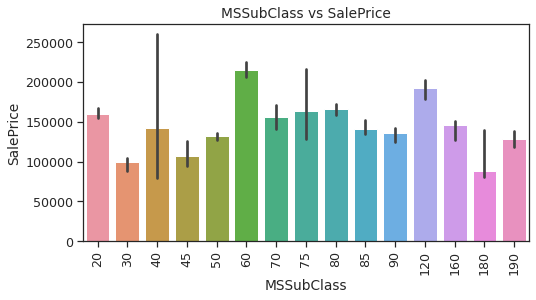

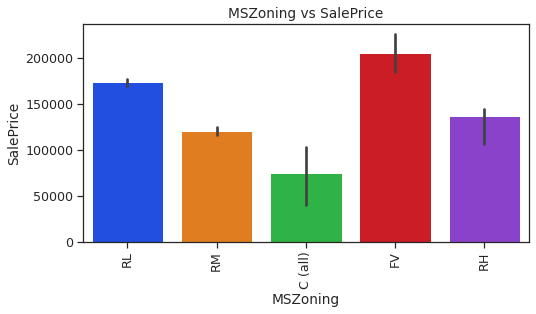

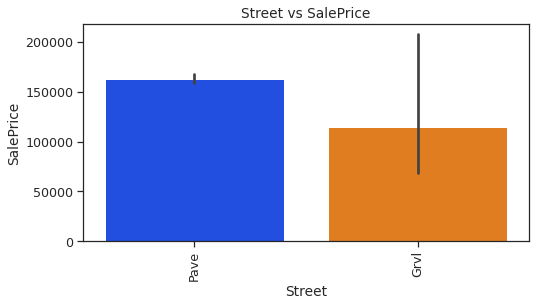

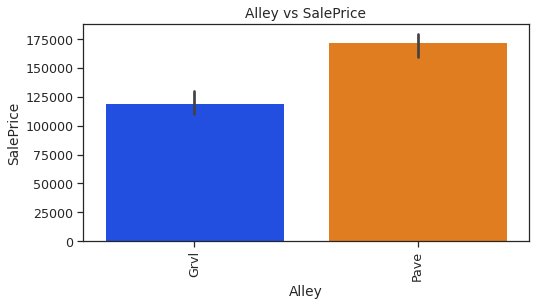

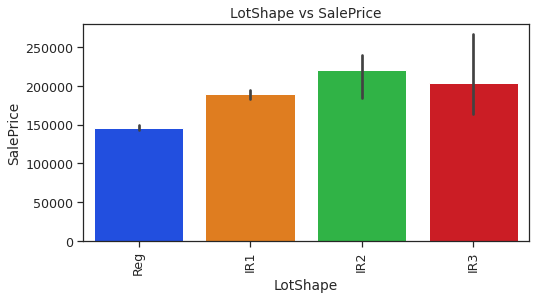

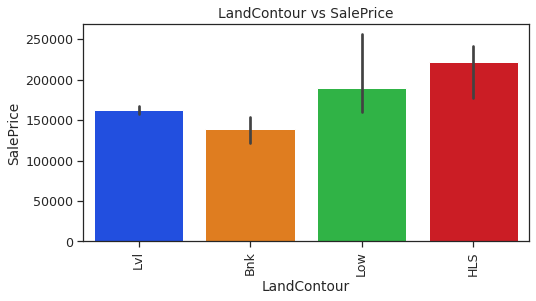

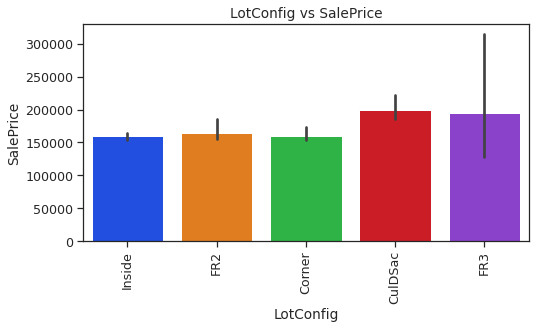

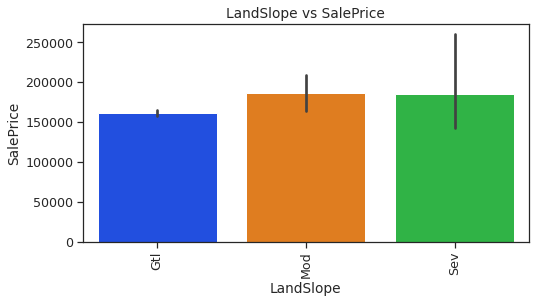

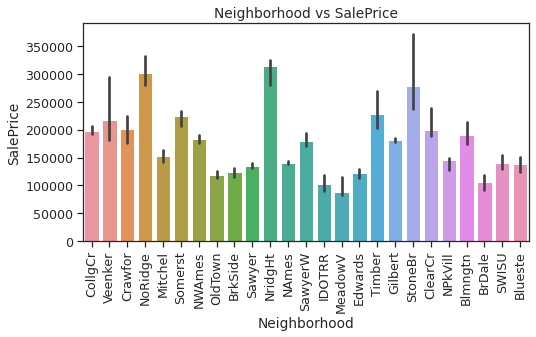

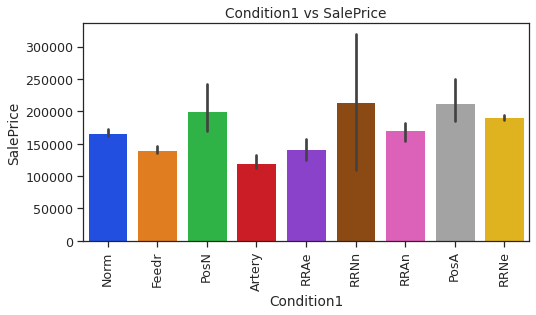

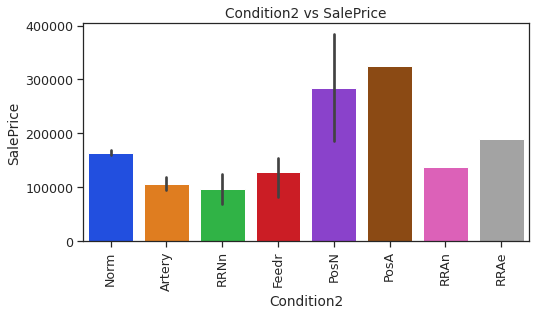

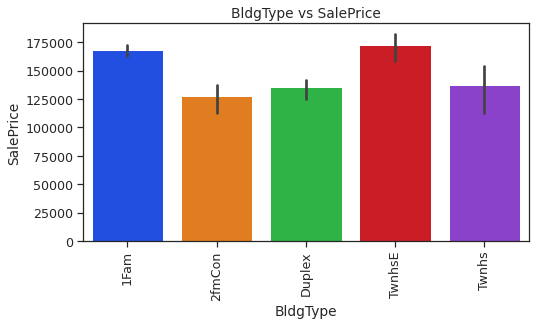

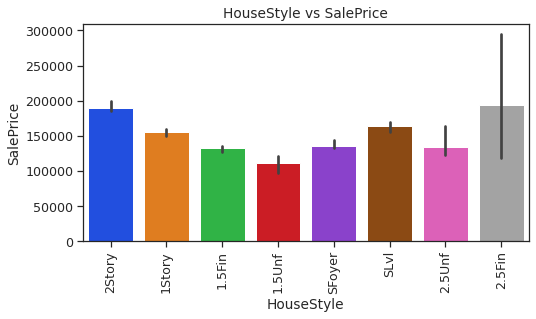

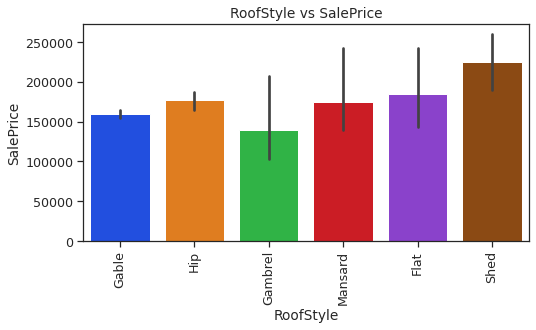

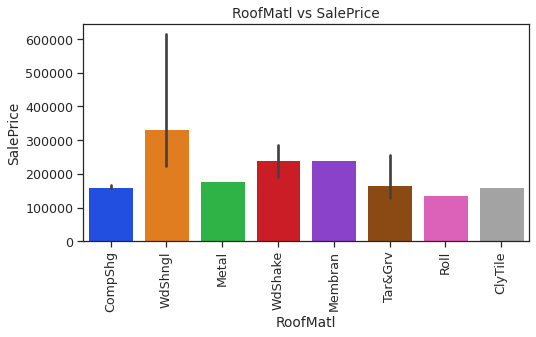

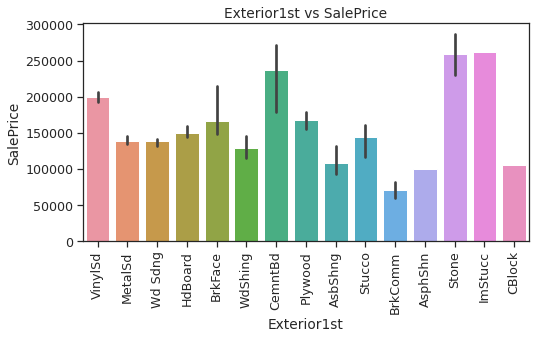

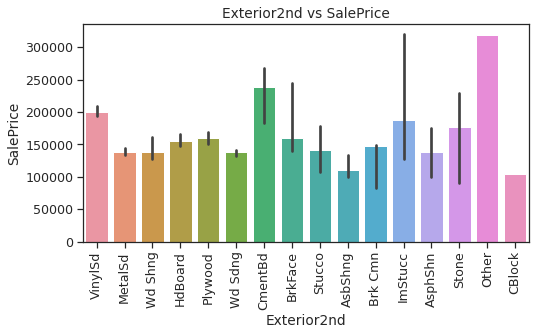

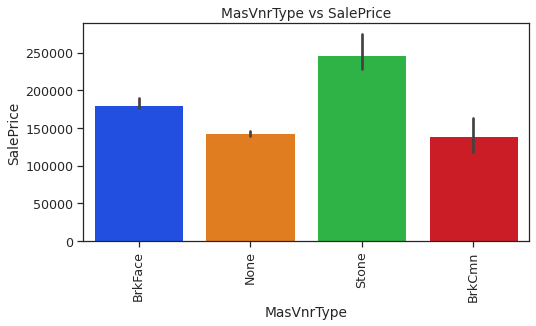

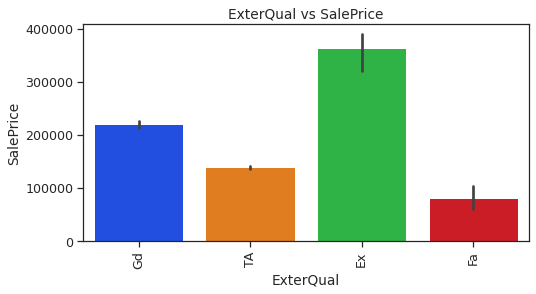

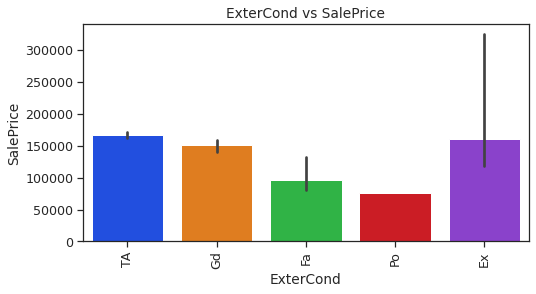

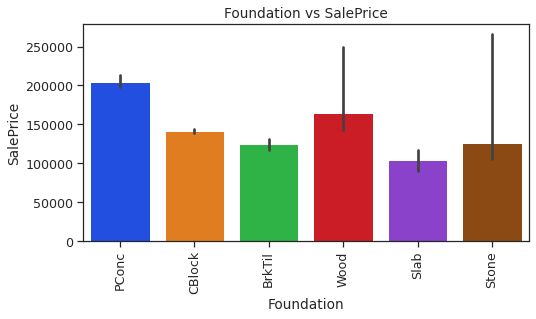

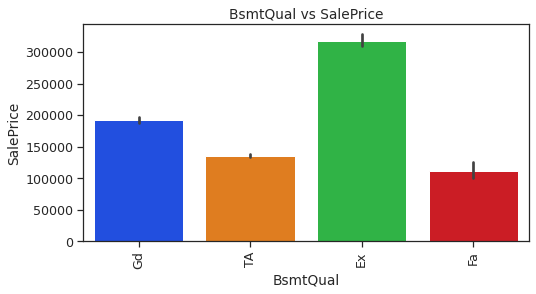

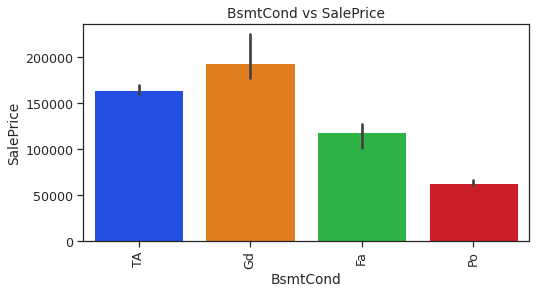

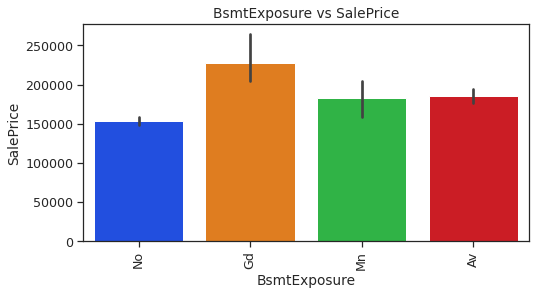

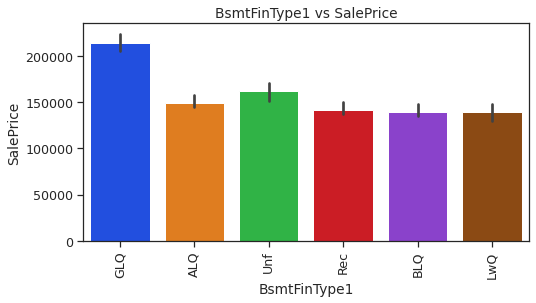

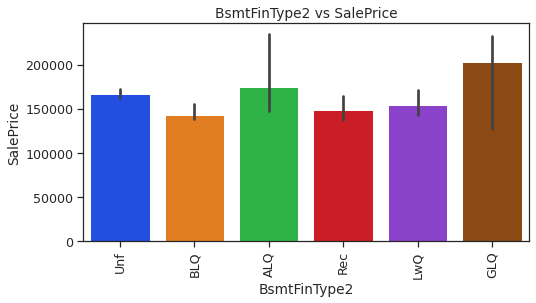

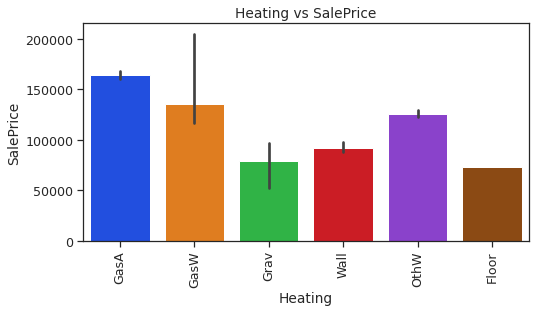

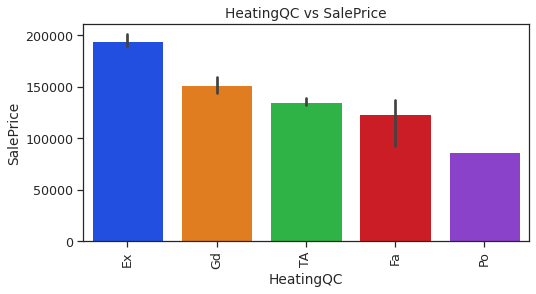

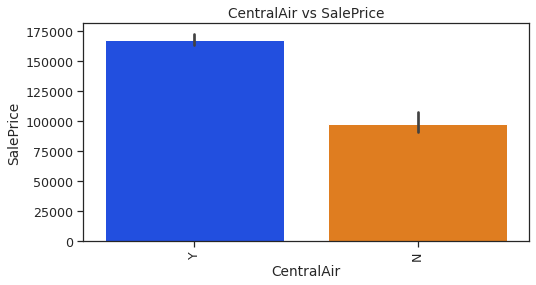

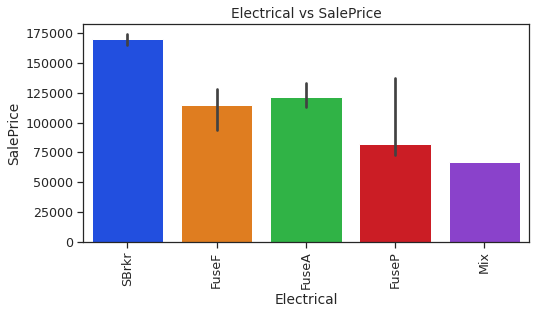

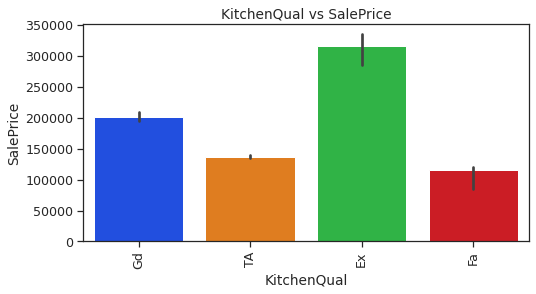

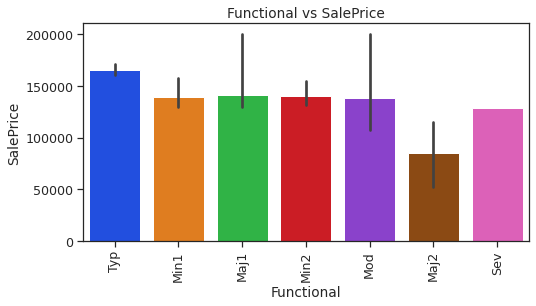

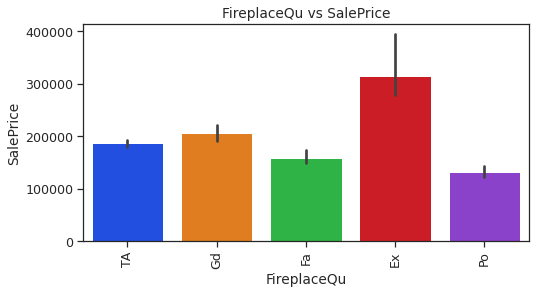

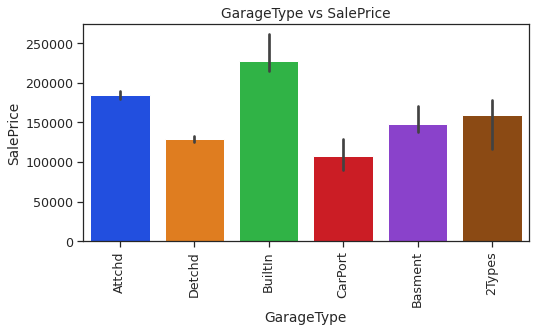

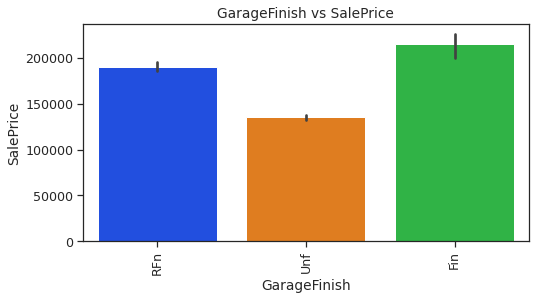

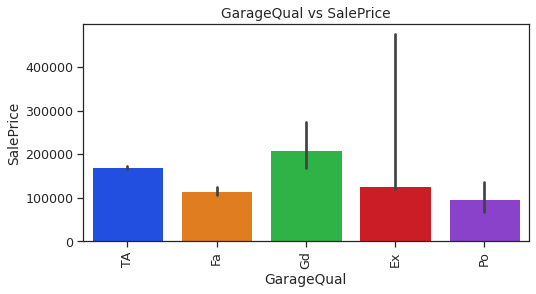

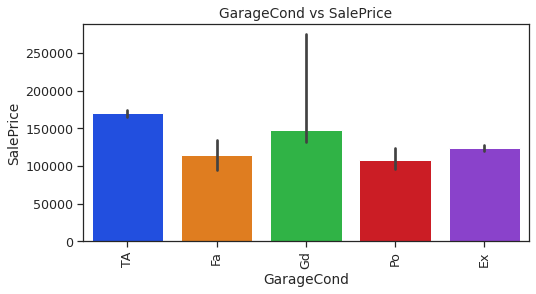

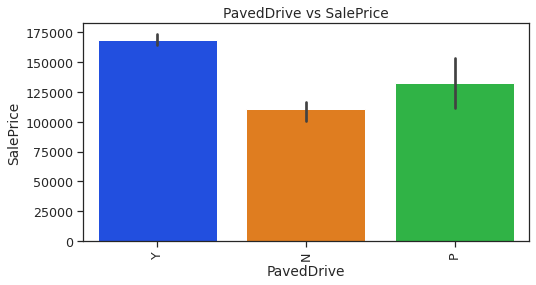

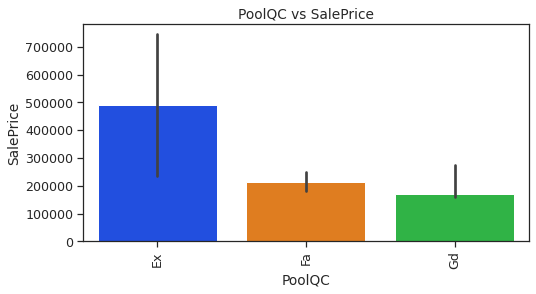

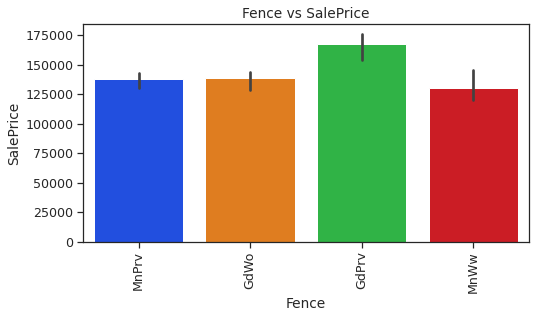

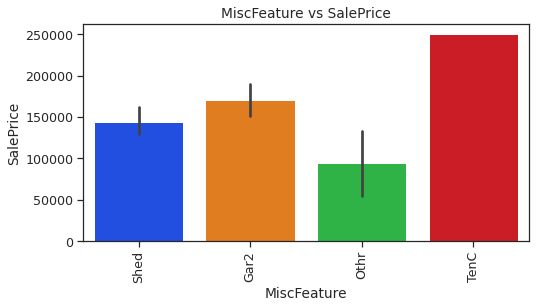

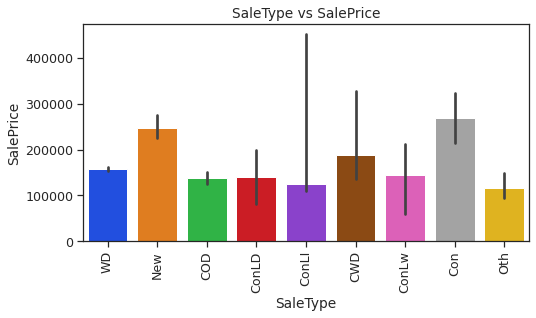

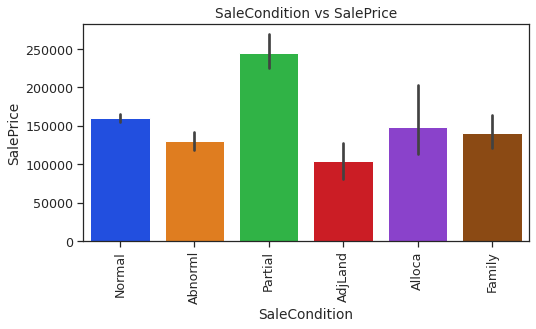

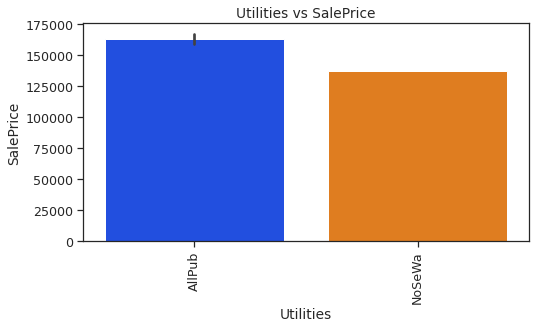

In [15]:
for col in categorical:
    copy = data.copy()
#     gr = copy.groupby(col)['SalePrice'].median()
    plt.figure(figsize=(8,4))
    sns.barplot(data=copy, x=col, y='SalePrice',estimator=np.median)
#     gr.plot(kind='bar')
    plt.ylabel('SalePrice')
    plt.xticks(rotation=90) 
    plt.title(str(col)+ ' vs SalePrice')
    plt.show()

In the graphs above, we see how prices correlate with each categorical value in each column.

# Feature Engineering

Based on the insights and assumptions we have made from the EDA, we will take action on the features accordingly. Since we have separate files for training set and testing set, the most of the procedures, if not all, that are done on the training set will be done to the testing set as well.

## Training Data

In [16]:
missing = data.columns[data.isna().any()]

## Missing Categorical Data

In [17]:
missing_cat = []
for col in missing:
    if data[col].dtype == 'O':
        missing_cat.append(col)
        print(col.ljust(15), ':', str(data[col].isna().sum()).ljust(5), 'missing values out of', len(data))

Alley           : 1369  missing values out of 1460
MasVnrType      : 8     missing values out of 1460
BsmtQual        : 37    missing values out of 1460
BsmtCond        : 37    missing values out of 1460
BsmtExposure    : 38    missing values out of 1460
BsmtFinType1    : 37    missing values out of 1460
BsmtFinType2    : 38    missing values out of 1460
Electrical      : 1     missing values out of 1460
FireplaceQu     : 690   missing values out of 1460
GarageType      : 81    missing values out of 1460
GarageFinish    : 81    missing values out of 1460
GarageQual      : 81    missing values out of 1460
GarageCond      : 81    missing values out of 1460
PoolQC          : 1453  missing values out of 1460
Fence           : 1179  missing values out of 1460
MiscFeature     : 1406  missing values out of 1460


In [18]:
def replaceMissing(data, columns, value):
    copy = data.copy()
    copy[columns] = copy[columns].fillna(value)
    return copy

data = replaceMissing(data, missing_cat, 'Missing')
data[missing_cat].isna().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [19]:
data[missing_cat].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,Missing,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing
1,Missing,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
2,Missing,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing
3,Missing,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,Missing,Missing,Missing
4,Missing,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,Missing,Missing,Missing


## Missing Numerical Data

In [20]:
missing_num = []
for col in missing:
    if data[col].dtype != 'O':
        missing_num.append(col)
        print(col.ljust(15), ':', str(data[col].isna().sum()).ljust(5), 'missing values out of', len(data))

LotFrontage     : 259   missing values out of 1460
MasVnrArea      : 8     missing values out of 1460
GarageYrBlt     : 81    missing values out of 1460


In [21]:
for col in missing_num:
    median = data[col].median()
#     data[col+'_isNull'] = np.where(data[col].isna(),1,0)
    data[col] = data[col].fillna(median)
data[missing_num].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [22]:
data[missing_num].head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


## Treating Temporal Data

In [23]:
for col in temp:
    data[col] = data['YrSold'] - data[col]

In [24]:
data[temp].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


## Treating Outliers and Transforming Data

In [25]:
data['LotFrontage'].sort_values(ascending=False)

934     313.0
1298    313.0
1127    182.0
197     174.0
231     174.0
        ...  
614      21.0
1038     21.0
1039     21.0
655      21.0
649      21.0
Name: LotFrontage, Length: 1460, dtype: float64

In [26]:
data = data[data['LotFrontage'] < 300]
data['LotFrontage'].sort_values(ascending=False)

1127    182.0
197     174.0
231     174.0
1107    168.0
1182    160.0
        ...  
614      21.0
1038     21.0
1039     21.0
655      21.0
649      21.0
Name: LotFrontage, Length: 1458, dtype: float64

In [27]:
alpha = 0
for col in continuous:
    if 0 in data[col].unique():
        pass
    else:
        x = st.boxcox(abs(data[col]))
        if col == 'SalePrice':
            alpha = x[1]
        data[col] = x[0]

In [28]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,22.036451,10.825837,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.216346,854,0,8.786793,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,7.902358
1,2,20,RL,25.473768,11.007341,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,6.543006,0,0,8.369951,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,7.848498
2,3,60,RL,22.744101,11.234207,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.277260,866,0,8.846910,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,7.929122
3,4,70,RL,20.831484,10.999895,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.314042,756,0,8.792436,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,7.746099
4,5,60,RL,26.351668,11.575944,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,6.461428,1053,0,9.135437,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,7.971985


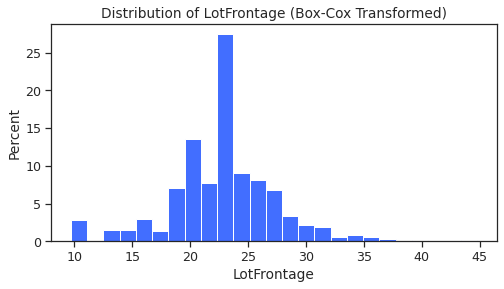

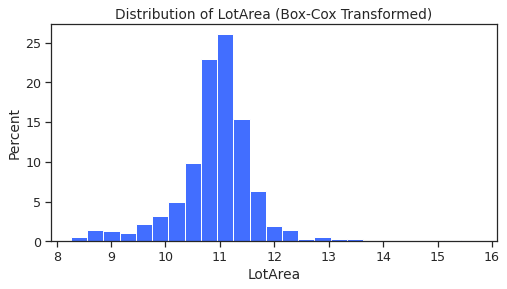

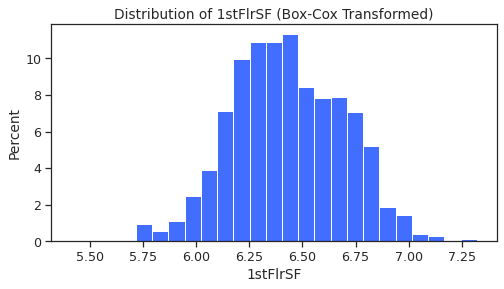

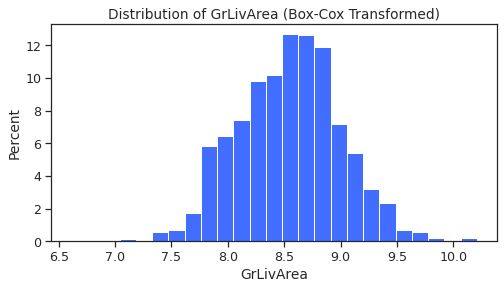

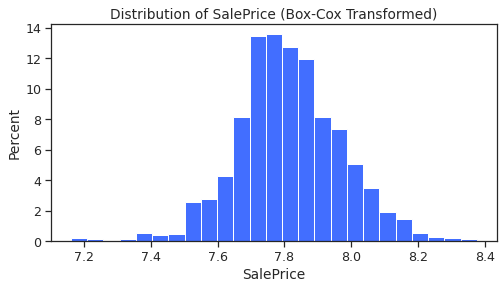

In [29]:
for col in continuous:
    if 0 in data[col].unique():
        pass
    else:
        plt.figure(figsize=(8,4))
        sns.histplot(data=data, x=col, stat='percent', bins=25)
        plt.title('Distribution of ' + col + ' (Box-Cox Transformed)')
        plt.show()

In [30]:
for col in categorical:
    pct = data.groupby(col)['SalePrice'].count()/len(data)
    index = pct[pct>0.01].index
    data[col] = np.where(data[col].isin(index), data[col], 'Outliers')

In [31]:
for col in categorical:
    print(col.ljust(13), ':', len(data[col].unique()), 'categories')

MSSubClass    : 13 categories
MSZoning      : 5 categories
Street        : 2 categories
Alley         : 3 categories
LotShape      : 4 categories
LandContour   : 4 categories
LotConfig     : 5 categories
LandSlope     : 3 categories
Neighborhood  : 23 categories
Condition1    : 6 categories
Condition2    : 2 categories
BldgType      : 5 categories
HouseStyle    : 6 categories
RoofStyle     : 3 categories
RoofMatl      : 2 categories
Exterior1st   : 11 categories
Exterior2nd   : 11 categories
MasVnrType    : 5 categories
ExterQual     : 4 categories
ExterCond     : 4 categories
Foundation    : 5 categories
BsmtQual      : 5 categories
BsmtCond      : 5 categories
BsmtExposure  : 5 categories
BsmtFinType1  : 7 categories
BsmtFinType2  : 7 categories
Heating       : 3 categories
HeatingQC     : 5 categories
CentralAir    : 2 categories
Electrical    : 4 categories
KitchenQual   : 4 categories
Functional    : 5 categories
FireplaceQu   : 6 categories
GarageType    : 6 categories
GarageFini

In [32]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,22.036451,10.825837,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.216346,854,0,8.786793,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,7.902358
1,2,20,RL,25.473768,11.007341,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Outliers,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,6.543006,0,0,8.369951,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,7.848498
2,3,60,RL,22.744101,11.234207,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.277260,866,0,8.846910,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,7.929122
3,4,70,RL,20.831484,10.999895,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.314042,756,0,8.792436,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,7.746099
4,5,60,RL,26.351668,11.575944,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,6.461428,1053,0,9.135437,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,7.971985


In [33]:
data.shape

(1458, 81)

## Encoding Categorical Features

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
for col in categorical:
    enc = LabelEncoder()
    label = enc.fit_transform(data[col])
    data[col] = label

In [36]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,6,3,22.036451,10.825837,1,1,3,3,0,3,0,4,2,0,0,2,7,5,5,5,0,0,8,8,1,196.0,1,3,3,2,4,4,2,706,6,0,150,856,0,0,1,3,6.216346,854,0,8.786793,1,0,2,1,3,1,2,8,4,0,3,0,5.0,2,2,548,3,3,2,0,61,0,0,0,0,0,2,0,0,2,2008,3,2,7.902358
1,2,3,3,25.473768,11.007341,1,1,3,3,0,2,0,16,1,0,0,1,6,8,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978,6,0,284,1262,0,0,1,3,6.543006,0,0,8.369951,0,1,2,0,3,1,3,6,4,1,5,0,31.0,2,2,460,3,3,2,298,0,0,0,0,0,0,2,0,0,5,2007,3,2,7.848498
2,3,6,3,22.744101,11.234207,1,1,0,3,0,3,0,4,2,0,0,2,7,5,7,6,0,0,8,8,1,162.0,1,3,3,2,4,3,2,486,6,0,434,920,0,0,1,3,6.277260,866,0,8.846910,1,0,2,1,3,1,2,6,4,1,5,0,7.0,2,2,608,3,3,2,0,42,0,0,0,0,0,2,0,0,9,2008,3,2,7.929122
3,4,7,3,20.831484,10.999895,1,1,0,3,0,0,0,5,2,0,0,2,7,5,91,36,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216,6,0,540,756,0,2,1,3,6.314042,756,0,8.792436,1,0,1,0,3,1,2,7,4,1,2,3,8.0,3,3,642,3,3,2,0,35,272,0,0,0,0,2,0,0,2,2006,3,0,7.746099
4,5,6,3,26.351668,11.575944,1,1,0,3,0,2,0,13,2,0,0,2,8,5,8,8,0,0,8,8,1,350.0,1,3,3,2,4,0,2,655,6,0,490,1145,0,0,1,3,6.461428,1053,0,9.135437,1,0,2,1,4,1,2,9,4,1,5,0,8.0,2,3,836,3,3,2,192,84,0,0,0,0,0,2,0,0,12,2008,3,2,7.971985


## Scaling Numerical Features

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
col_scale = [col for col in data.columns if col not in ['Id','SalePrice']]

scaler = MinMaxScaler()
scaler.fit(data[col_scale])

MinMaxScaler()

In [39]:
data[col_scale] = scaler.transform(data[col_scale])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,0.500000,0.75,0.351741,0.343612,1.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.25,0.12250,0.333333,1.0,0.75,0.5,1.00,1.00,0.333333,0.312389,1.0,0.0,0.064212,0.266999,0.0,0.0,1.0,1.0,0.421723,0.413559,0.0,0.605262,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.394245,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,7.902358
1,2,0.250000,0.75,0.449788,0.367954,1.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.432743,1.0,0.0,0.121575,0.393637,0.0,0.0,1.0,1.0,0.592817,0.000000,0.0,0.489399,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.330935,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,7.848498
2,3,0.500000,0.75,0.371926,0.398379,1.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.25,0.10125,0.333333,1.0,0.75,0.5,1.00,0.75,0.333333,0.215044,1.0,0.0,0.185788,0.286962,0.0,0.0,1.0,1.0,0.453628,0.419370,0.0,0.621972,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.437410,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,7.929122
3,4,0.583333,0.75,0.317370,0.366955,1.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.50,0.00000,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,0.095575,1.0,0.0,0.231164,0.235808,0.0,0.5,1.0,1.0,0.472893,0.366102,0.0,0.606831,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.461871,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,7.746099
4,5,0.500000,0.75,0.474829,0.444211,1.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.25,0.21875,0.333333,1.0,0.75,0.5,1.00,0.00,0.333333,0.289823,1.0,0.0,0.209760,0.357143,0.0,0.0,1.0,1.0,0.550090,0.509927,0.0,0.702170,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.601439,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,7.971985


In [40]:
# inv_boxcox(data['SalePrice'], -0.07692391328663316)

In [41]:
# data.to_csv('final_train.csv', index=False)

## Test Data

The same procedures done on the training data are now done to the test set. Note that no rows will be removed in the test data.

In [42]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test.shape

(1459, 80)

In [43]:
missing = test.columns[test.isna().any()]

In [44]:
missing_cat = []
for col in missing:
    if test[col].dtype == 'O':
        missing_cat.append(col)
        print(col.ljust(15), ':', str(test[col].isna().sum()).ljust(5), 'missing values out of', len(test))

MSZoning        : 4     missing values out of 1459
Alley           : 1352  missing values out of 1459
Utilities       : 2     missing values out of 1459
Exterior1st     : 1     missing values out of 1459
Exterior2nd     : 1     missing values out of 1459
MasVnrType      : 16    missing values out of 1459
BsmtQual        : 44    missing values out of 1459
BsmtCond        : 45    missing values out of 1459
BsmtExposure    : 44    missing values out of 1459
BsmtFinType1    : 42    missing values out of 1459
BsmtFinType2    : 42    missing values out of 1459
KitchenQual     : 1     missing values out of 1459
Functional      : 2     missing values out of 1459
FireplaceQu     : 730   missing values out of 1459
GarageType      : 76    missing values out of 1459
GarageFinish    : 78    missing values out of 1459
GarageQual      : 78    missing values out of 1459
GarageCond      : 78    missing values out of 1459
PoolQC          : 1456  missing values out of 1459
Fence           : 1169  missing

In [45]:
def replaceMissing(data, columns, value):
    copy = data.copy()
    copy[columns] = copy[columns].fillna(value)
    return copy

test = replaceMissing(test, missing_cat, 'Missing')
test[missing_cat].isna().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [46]:
test[missing_cat].head()

,MSZoning,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,Missing,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,LwQ,TA,Typ,Missing,Attchd,Unf,TA,TA,Missing,MnPrv,Missing,WD
1,RL,Missing,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,Unf,Gd,Typ,Missing,Attchd,Unf,TA,TA,Missing,Missing,Gar2,WD
2,RL,Missing,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,Unf,TA,Typ,TA,Attchd,Fin,TA,TA,Missing,MnPrv,Missing,WD
3,RL,Missing,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,Unf,Gd,Typ,Gd,Attchd,Fin,TA,TA,Missing,Missing,Missing,WD
4,RL,Missing,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,Unf,Gd,Typ,Missing,Attchd,RFn,TA,TA,Missing,Missing,Missing,WD


In [47]:
missing_num = []
for col in missing:
    if test[col].dtype != 'O':
        missing_num.append(col)
        print(col.ljust(15), ':', str(test[col].isna().sum()).ljust(5), 'missing values out of', len(test))

LotFrontage     : 227   missing values out of 1459
MasVnrArea      : 15    missing values out of 1459
BsmtFinSF1      : 1     missing values out of 1459
BsmtFinSF2      : 1     missing values out of 1459
BsmtUnfSF       : 1     missing values out of 1459
TotalBsmtSF     : 1     missing values out of 1459
BsmtFullBath    : 2     missing values out of 1459
BsmtHalfBath    : 2     missing values out of 1459
GarageYrBlt     : 78    missing values out of 1459
GarageCars      : 1     missing values out of 1459
GarageArea      : 1     missing values out of 1459


In [48]:
for col in missing_num:
    median = test[col].median()
#     test[col+'_isNull'] = np.where(test[col].isna(),1,0)
    test[col] = test[col].fillna(median)
test[missing_num].isna().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [49]:
test[missing_num].head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,80.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1961.0,1.0,730.0
1,81.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1958.0,1.0,312.0
2,74.0,0.0,791.0,0.0,137.0,928.0,0.0,0.0,1997.0,2.0,482.0
3,78.0,20.0,602.0,0.0,324.0,926.0,0.0,0.0,1998.0,2.0,470.0
4,43.0,0.0,263.0,0.0,1017.0,1280.0,0.0,0.0,1992.0,2.0,506.0


In [50]:
for col in temp:
    test[col] = test['YrSold'] - test[col]

In [51]:
test[temp].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [52]:
for col in continuous:
    if col == 'SalePrice':
        continue
    if 0 in test[col].unique():
        pass
    else:
        x = st.boxcox(abs(test[col]))
        test[col] = x[0]

In [53]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,28.123118,67.457594,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,5.755026,0,0,6.191811,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,28.376770,72.524215,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,6.032065,0,0,6.516115,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,26.579754,71.732696,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,5.779909,701,0,6.682155,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,27.612819,63.910874,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,5.778381,678,0,6.669572,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,17.848500,49.970732,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,6.005904,0,0,6.485366,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal


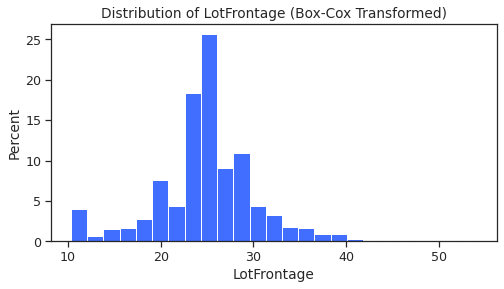

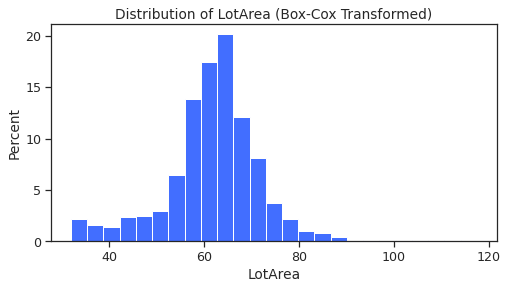

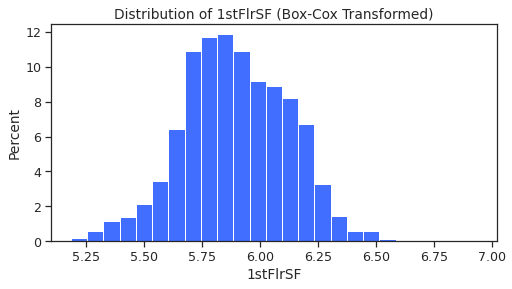

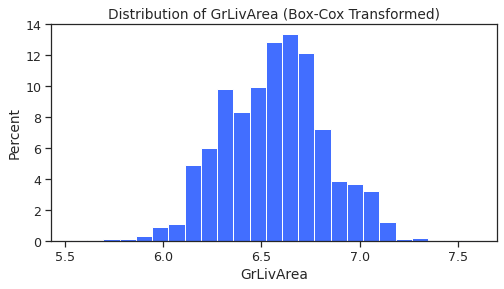

In [54]:
for col in continuous:
    if col == 'SalePrice':
        continue
    if 0 in test[col].unique():
        pass
    else:
        plt.figure(figsize=(8,4))
        sns.histplot(data=test, x=col, stat='percent', bins=25)
        plt.title('Distribution of ' + col + ' (Box-Cox Transformed)')
        plt.show()

In [55]:
for col in categorical:
    pct = test[col].value_counts(normalize=True)
    index = pct[pct>0.01].index
    test[col] = np.where(test[col].isin(index), test[col], 'Outliers')

In [56]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,Outliers,28.123118,67.457594,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,5.755026,0,0,6.191811,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,28.376770,72.524215,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,6.032065,0,0,6.516115,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Outliers,12500,6,2010,WD,Normal
2,1463,60,RL,26.579754,71.732696,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,5.779909,701,0,6.682155,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,27.612819,63.910874,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,5.778381,678,0,6.669572,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,17.848500,49.970732,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,6.005904,0,0,6.485366,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal


In [57]:
for col in categorical:
    print(col.ljust(13), ':', len(test[col].unique()), 'categories')

MSSubClass    : 12 categories
MSZoning      : 5 categories
Street        : 2 categories
Alley         : 3 categories
LotShape      : 4 categories
LandContour   : 4 categories
LotConfig     : 5 categories
LandSlope     : 3 categories
Neighborhood  : 21 categories
Condition1    : 7 categories
Condition2    : 2 categories
BldgType      : 5 categories
HouseStyle    : 6 categories
RoofStyle     : 3 categories
RoofMatl      : 2 categories
Exterior1st   : 11 categories
Exterior2nd   : 12 categories
MasVnrType    : 5 categories
ExterQual     : 4 categories
ExterCond     : 4 categories
Foundation    : 5 categories
BsmtQual      : 5 categories
BsmtCond      : 5 categories
BsmtExposure  : 5 categories
BsmtFinType1  : 7 categories
BsmtFinType2  : 7 categories
Heating       : 2 categories
HeatingQC     : 5 categories
CentralAir    : 2 categories
Electrical    : 4 categories
KitchenQual   : 5 categories
Functional    : 5 categories
FireplaceQu   : 6 categories
GarageType    : 7 categories
GarageFini

In [58]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,Outliers,28.123118,67.457594,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,5.755026,0,0,6.191811,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,28.376770,72.524215,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,6.032065,0,0,6.516115,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Outliers,12500,6,2010,WD,Normal
2,1463,60,RL,26.579754,71.732696,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,5.779909,701,0,6.682155,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,27.612819,63.910874,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,5.778381,678,0,6.669572,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,17.848500,49.970732,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,6.005904,0,0,6.485366,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal


In [59]:
test.shape

(1459, 80)

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
for col in categorical:
    enc = LabelEncoder()
    label = enc.fit_transform(test[col])
    test[col] = label

In [62]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,3,2,28.123118,67.457594,1,1,3,3,0,3,0,9,1,0,0,1,5,6,49,49,0,0,8,9,2,0.0,3,3,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,5.755026,0,0,6.191811,0.0,0.0,1,0,2,1,4,5,4,0,3,1,49.0,3,1.0,730.0,3,3,2,140,0,0,0,120,0,0,3,0,0,6,2010,4,2
1,1462,3,3,28.376770,72.524215,1,1,0,3,0,0,0,9,2,0,0,1,6,6,52,52,1,0,9,10,0,108.0,3,3,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,6.032065,0,0,6.516115,0.0,0.0,1,1,3,1,2,6,4,0,3,1,52.0,3,1.0,312.0,3,3,2,393,36,0,0,0,0,0,2,1,12500,6,2010,4,2
2,1463,6,3,26.579754,71.732696,1,1,0,3,0,3,0,5,2,0,0,2,5,5,13,12,0,0,8,9,2,0.0,3,3,3,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,5.779909,701,0,6.682155,0.0,0.0,2,1,3,1,4,6,4,1,5,1,13.0,0,2.0,482.0,3,3,2,212,34,0,0,0,0,0,3,0,0,3,2010,4,2
3,1464,6,3,27.612819,63.910874,1,1,0,3,0,3,0,5,2,0,0,2,6,6,12,12,0,0,8,9,0,20.0,3,3,3,4,4,4,2,602.0,6,0.0,324.0,926.0,0,0,1,3,5.778381,678,0,6.669572,0.0,0.0,2,1,3,1,2,7,4,1,2,1,12.0,0,2.0,470.0,3,3,2,360,36,0,0,0,0,0,2,0,0,6,2010,4,2
4,1465,0,3,17.848500,49.970732,1,1,0,1,0,3,0,19,2,0,4,1,8,5,18,18,0,0,3,4,2,0.0,2,3,3,2,4,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,6.005904,0,0,6.485366,0.0,0.0,2,0,2,1,2,5,4,0,3,1,18.0,2,2.0,506.0,3,3,2,0,82,0,0,144,0,0,2,0,0,1,2010,4,2


In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
col_scale = [col for col in data.columns if col not in ['Id','SalePrice']]

scaler = MinMaxScaler()
scaler.fit(test[col_scale])

MinMaxScaler()

In [65]:
test[col_scale] = scaler.transform(test[col_scale])
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0.272727,0.50,0.406634,0.415038,1.0,0.5,1.0,1.000000,0.0,0.75,0.0,0.45,0.166667,0.0,0.0,0.2,0.444444,0.625,0.384615,0.822581,0.0,0.0,0.8,0.818182,0.5,0.000000,1.000000,1.0,0.25,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.326046,0.000000,0.0,0.319862,0.0,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.75,0.0,0.000000,0.454545,1.0,1.0,0.5
1,1462,0.272727,0.75,0.412434,0.474325,1.0,0.5,0.0,1.000000,0.0,0.00,0.0,0.45,0.333333,0.0,0.0,0.2,0.555556,0.625,0.407692,0.870968,0.5,0.0,0.9,0.909091,0.0,0.083721,1.000000,1.0,0.25,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.484138,0.000000,0.0,0.477042,0.0,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.50,0.5,0.735294,0.454545,1.0,1.0,0.5
2,1463,0.545455,0.75,0.371344,0.465063,1.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.0,0.4,0.444444,0.500,0.107692,0.225806,0.0,0.0,0.8,0.818182,0.5,0.000000,1.000000,1.0,0.75,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.340245,0.376477,0.0,0.557517,0.0,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.75,0.0,0.000000,0.181818,1.0,1.0,0.5
3,1464,0.545455,0.75,0.394966,0.373537,1.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.0,0.4,0.555556,0.625,0.100000,0.225806,0.0,0.0,0.8,0.818182,0.0,0.015504,1.000000,1.0,0.75,1.0,1.0,1.0,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.339373,0.364125,0.0,0.551418,0.0,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.454545,1.0,1.0,0.5
4,1465,0.000000,0.75,0.171695,0.210418,1.0,0.5,0.0,0.333333,0.0,0.75,0.0,0.95,0.333333,0.0,1.0,0.2,0.777778,0.500,0.146154,0.322581,0.0,0.0,0.3,0.363636,0.5,0.000000,0.666667,1.0,0.75,0.5,1.0,1.0,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.469209,0.000000,0.0,0.462139,0.0,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.50,0.0,0.000000,0.000000,1.0,1.0,0.5


In [66]:
# test.to_csv('final_test.csv', index=False)

# Feature Selection

Recursive Feature Elimination will be used as our method of feature selection. The aim is to reduce the number of columns used in the prediction, maintaining the model's efficiency while also getting the best score, RMSE in this particular case.

## Splitting Feature and Target

In [67]:
y_train = data['SalePrice']
X_train = data.drop('SalePrice', axis=1)
X_test = test
X_test.shape, X_train.shape, y_train.shape

((1459, 80), (1458, 80), (1458,))

## Initial Model Evaluation

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [69]:
reg = LinearRegression()
reg.fit(X_train,y_train)
cv_results = cross_val_score(reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
print(abs(cv_results))
print(abs(np.mean(cv_results)))

[0.04788259 0.06094265 0.05160714 0.04605919 0.04688244]
0.05067480340566829


In [70]:
y_pred = reg.predict(X_test)
y_pred

array([7.62824307, 7.75258195, 7.78203859, ..., 7.75766971, 7.63273043,
       7.87210811])

In [71]:
# inv_boxcox(y_pred, -0.07692391328663316)

## Reducing Dimensionality

In [72]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [73]:
min_features_to_select=1
rfecv = RFECV(estimator=reg, step=1, cv=KFold(5), scoring='neg_root_mean_squared_error', min_features_to_select=min_features_to_select)
rfecv.fit(X_train,y_train)
print("Optimal number of features : %d" % rfecv.n_features_)
print(rfecv.score(X_train,y_train))

Optimal number of features : 69
0.9082519165405002


In [74]:
print(abs(rfecv.grid_scores_))

[0.09030995 0.07878609 0.07490368 0.06863084 0.06440846 0.06049208
 0.05933884 0.05779895 0.05623253 0.05552039 0.05467553 0.05422603
 0.05431195 0.05319649 0.0530306  0.05221093 0.05223634 0.05199371
 0.05182699 0.05166266 0.05164969 0.05135463 0.05139504 0.05127362
 0.05131432 0.0514899  0.05122676 0.05108873 0.05099949 0.05114662
 0.05116942 0.05098615 0.05103105 0.05095781 0.0508808  0.05083607
 0.05089903 0.05080281 0.05076286 0.05077159 0.05076324 0.05079755
 0.05078066 0.05076457 0.05057617 0.05052362 0.05050562 0.05060258
 0.05059331 0.05051269 0.05060057 0.05066579 0.05057679 0.05070103
 0.05094174 0.05089944 0.05166583 0.05048848 0.05085409 0.05074637
 0.05058982 0.05063116 0.05116535 0.05061923 0.05063235 0.05059316
 0.05068185 0.05109338 0.05048438 0.05063771 0.05059679 0.05068447
 0.05071087 0.05153105 0.05245103 0.05062383 0.05125101 0.05072999
 0.05086124 0.0506748 ]


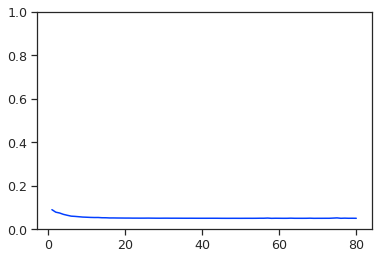

In [75]:
plt.figure(figsize=(6,4))
# plt.suptitle('RMSE for Features Used', fontsize=20, y=1.05)
plt.plot(range(min_features_to_select, len(rfecv.grid_scores_)+min_features_to_select), abs(rfecv.grid_scores_))
# labels('', 'Number of Features Used', 'RMSE score')
plt.ylim([0,1])
plt.show()

In [76]:
features = pd.DataFrame(X_train.columns)
features['ranking'] = rfecv.ranking_
features['support'] = rfecv.support_.astype('bool')
features[features['support'] == False]

,0,ranking,support
0,Id,12,False
1,MSSubClass,4,False
8,LandContour,10,False
12,Neighborhood,2,False
16,HouseStyle,5,False
21,RoofStyle,7,False
42,Electrical,9,False
48,BsmtHalfBath,6,False
58,GarageType,11,False
63,GarageQual,3,False


In [77]:
X_train_new = X_train[X_train.columns[rfecv.support_]]
X_train_new.shape

(1458, 69)

In [78]:
X_test_new = X_test[X_train.columns[rfecv.support_]]
X_test_new.shape

(1459, 69)

In [79]:
reg = LinearRegression()
reg.fit(X_train_new,y_train)
cv_results = cross_val_score(reg, X_train_new, y_train, scoring='neg_root_mean_squared_error', cv=5)
print(abs(cv_results))
print(abs(np.mean(cv_results)))

[4.69462234e-02 6.00983626e-02 5.07731896e-02 1.83986444e+09
 5.83135707e-02]
367972888.51548624


## Final Model Evaluation

In [80]:
from sklearn import metrics
def print_evaluate(true, pred):
    mae = metrics.mean_absolute_error(true, pred)
    mse = metrics.mean_squared_error(true, pred)
    rmse = np.sqrt(metrics.mean_squared_error(true, pred))
    r2 = metrics.r2_score(true, pred)
    print("Mean Absolute Error : %f" % mae)
    print("Mean Squared Error : %f" % mse)
    print("Root Mean Absolute Error : %f" % rmse)
    print("R-Squared : %f" % r2)
#     return mae, mse, rmse, r2

In [81]:
y1 = reg.predict(X_train_new)
print_evaluate(y_train,y1)

Mean Absolute Error : 0.032478
Mean Squared Error : 0.002258
Root Mean Absolute Error : 0.047514
R-Squared : 0.908252


## Saving the Results

In [82]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0.272727,0.50,0.406634,0.415038,1.0,0.5,1.0,1.000000,0.0,0.75,0.0,0.45,0.166667,0.0,0.0,0.2,0.444444,0.625,0.384615,0.822581,0.0,0.0,0.8,0.818182,0.5,0.000000,1.000000,1.0,0.25,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.326046,0.000000,0.0,0.319862,0.0,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.75,0.0,0.000000,0.454545,1.0,1.0,0.5
1,1462,0.272727,0.75,0.412434,0.474325,1.0,0.5,0.0,1.000000,0.0,0.00,0.0,0.45,0.333333,0.0,0.0,0.2,0.555556,0.625,0.407692,0.870968,0.5,0.0,0.9,0.909091,0.0,0.083721,1.000000,1.0,0.25,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.484138,0.000000,0.0,0.477042,0.0,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.50,0.5,0.735294,0.454545,1.0,1.0,0.5
2,1463,0.545455,0.75,0.371344,0.465063,1.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.0,0.4,0.444444,0.500,0.107692,0.225806,0.0,0.0,0.8,0.818182,0.5,0.000000,1.000000,1.0,0.75,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.340245,0.376477,0.0,0.557517,0.0,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.75,0.0,0.000000,0.181818,1.0,1.0,0.5
3,1464,0.545455,0.75,0.394966,0.373537,1.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.0,0.4,0.555556,0.625,0.100000,0.225806,0.0,0.0,0.8,0.818182,0.0,0.015504,1.000000,1.0,0.75,1.0,1.0,1.0,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.339373,0.364125,0.0,0.551418,0.0,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.50,0.0,0.000000,0.454545,1.0,1.0,0.5
4,1465,0.000000,0.75,0.171695,0.210418,1.0,0.5,0.0,0.333333,0.0,0.75,0.0,0.95,0.333333,0.0,1.0,0.2,0.777778,0.500,0.146154,0.322581,0.0,0.0,0.3,0.363636,0.5,0.000000,0.666667,1.0,0.75,0.5,1.0,1.0,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.469209,0.000000,0.0,0.462139,0.0,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.50,0.0,0.000000,0.000000,1.0,1.0,0.5


In [83]:
from scipy.special import inv_boxcox

In [84]:
final = inv_boxcox(y_pred, -0.07692391328663316)
final

array([ 97675.11089599, 132435.65882242, 142491.14647338, ...,
       134116.35140246,  98742.07835962, 178688.05886071])

In [85]:
submission = pd.DataFrame(test['Id'])
submission['SalePrice'] = final
submission.head()

,Id,SalePrice
0,1461,97675.110896
1,1462,132435.658822
2,1463,142491.146473
3,1464,155438.078121
4,1465,146609.305525


In [86]:
submission.to_csv('submission.csv', index = False)